# MEGI001-2101033 Introduction to Earth System Data

## Task 5.1 - Data Handling Analysis

Created on: Jan 23, 2019 by Ralph Florent <r.florent@jacobs-university.de>

## T 5.1 
Please use the dataset in ```../data_samples/hdf/NEONDSTowerTemperatureData.hdf5``` and load data from the tower **STER** under **Domain_10**.

You can re-use code from  [notebook 04](CH05-210103_04-data-load.ipynb). You can also visually inspect data with PanoPly.

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Jan 23 2019

@author: Angelo Rossi, Ralph Florent
"""
# Import relevant libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import h5py

# define file path to load data from file
path = '../assets/data/hdf/'
filename = 'data-file@task4.3.hdf5'

# load and show data from hdf5 source
filepath = path + filename
file = h5py.File(filepath, 'r')
list(file.keys())

['Domain_03', 'Domain_10']

In [4]:
# 
domain_10 = file['Domain_10']
list(domain_10)

['STER']

In [5]:
ster_data = domain_10['STER']
list(ster_data)

['min_1', 'min_30']

In [12]:
dataset = ster_data['min_1']['boom_1']['temperature']
list(dataset.attrs)

['date',
 'numPts',
 'mean',
 'min',
 'max',
 'variance',
 'stdErr',
 'uncertainty',
 'Product ID',
 'Product Name']

In [14]:
# Distribute the data between date and mean (from columns)
from datetime import datetime

sample_date_mean = dataset['date', 'mean']
dates = [x[0] for x in sample_date_mean]
temps = [y[1] for y in sample_date_mean]
datesStr=["".join([chr(y) for y in x[:-2]]) for x in dates]
times = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in datesStr]
print(times[:5])

[datetime.datetime(2014, 4, 1, 0, 0), datetime.datetime(2014, 4, 1, 0, 1), datetime.datetime(2014, 4, 1, 0, 2), datetime.datetime(2014, 4, 1, 0, 3), datetime.datetime(2014, 4, 1, 0, 4)]


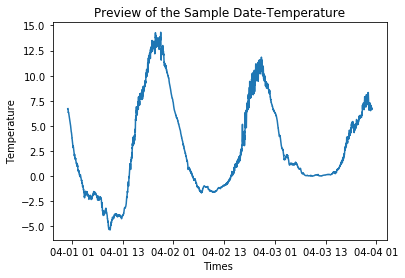

In [15]:
plt.plot(times, temps)
plt.title('Preview of the Sample Date-Temperature')
plt.xlabel('Times ')
plt.ylabel('Temperature')
plt.show()

#### Comments
Note that in this exercise, the data is structured in a way that we have to list the attributes and regroup them accordingly as a sample dataset in order to plot them. Of course, we can automate the process so that the lookup can be done programatically.